# Natural Language Processing with Deep Learning - LDSCI7226

## AE1 - Coding Assignment 

### Student ID: 23220052



Before starting our assignment, we will be importing all libraries and packages required for our program solution.

- "import nltk" to work with human language data (NLTK, 2009).
- "from nltk.tokenize import word_tokenize, sent_tokenize" to tokenize text into words and sentences (Sanketh, 2021).
- "from nltk.stem import WordNetLemmatizer" to reduce words to their base or root form (GeeksforGeeks, 2018).
- "from nltk.stem import PorterStemmer, WordNetLemmatizer" to reduce words to their root form by removing suffixes (Training, 2023).
- "from nltk.corpus import stopwords" to provide predefined lists of stopwords for various languages (Geeksforgeeks, 2017).
- "import string" module to check if a character, slice, or string contains letters, digits, symbols (Launch code education, n.d.).
- ⁠"import re" module to provide regular expression matching operations(Python, 2009).
- "import pandas as pd" library to manipulate and analyse data (W3 School, n.d.).
- "import spacy" provides functionalities like tokenization, part-of-speech tagging, named entity recognition, and dependency parsing (SpaCy, n.d.).
- "import random" creates randomized datasets (Solomon, n.d.).
- ⁠"import matplotlib.pyplot as plt" module to create different types of plots and charts (Matplotlib, n.d.).
- ⁠"import seaborn as sns" data visualization library (based on Matplotlib) to make statistical graphics, explore and understand the data (Seaborn, n.d.).
- "from collections import Counter" to count the frequency of elements in a list or other iterable (Tariq, 2023).
- ⁠"import numpy as np" library to perform mathematical operations (GeeksforGeeks, 2021).
- "from string import punctuation" to provide a list of punctuation characters which can be used to remove or manipulate punctuation in text data (Verma, 2022).
- "from sklearn.model_selection import train_test_split" to split datasets into training and testing subsets (scikit-learn, 2018).
- "from tensorflow.keras.preprocessing.text import Tokenizer" to vectorize a text corpus by turning text into lists of word indices (Raj, 2024).
- "from tensorflow.keras.preprocessing.sequence import pad_sequences" to ensure that all input sequences have the same length (Malhotra, 2024).
- "from tensorflow.keras.models import Sequential" to build neural network models (Brownlee, 2016).
- "from tensorflow.keras.layers import Embedding" to convert word indices into dense vectors of fixed size (Saxena, 2021).
- "from tensorflow.keras.layers import LSTM" to learn long-term dependencies in sequence data (Brownlee, 2016).
- "from tensorflow.keras.layers import Dense" to build blocks of Neural Networks (Brownlee, 2022).
- "from tensorflow.keras.layers import Bidirectional" to present the input sequence in forward and backward order (Brownlee, 2016).
- "from tensorflow.keras.layers import SpatialDropout1D" to prevent overfitting by randomly setting a fraction of input units to 0 (Darmanin, 2024).
- "from tensorflow.keras.callbacks import EarlyStopping" to stop training when a monitored metric has stopped improving, preventing overfitting and reducing training time (Bhattbhatt, 2024).
- "from tensorflow.keras.utils import to_categorical" to convert a class vector (integers) to binary class matrix (one-hot encoding) (Learnopencv, 2017).
- "from sklearn.preprocessing import LabelEncoder" to convert categorical labels into a numeric format that can be processed by ML algorithms (scikit-learn, 2019).
- "from sklearn.model_selection import train_test_split" to split arrays or matrices into random train and test subsets (scikit-learn, 2018).
- "from sklearn.feature_extraction.text import CountVectorizer" to convert a collection of text documents to a matrix of token counts (scikit-learn, 2018).
- "from sklearn.feature_selection import SelectKBest" to identify and retain only the most significant features that contribute to the predictive power of a model (Abel, 2023).
- "from sklearn.feature_selection import chi2" rank features according to their chi-squared statistics with respect to the target variable (scikit-learn, n.d).
- "from sklearn.naive_bayes import MultinomialNB" to use Naive Bayes classifier for multinomial models (scikit-learn, 2019).
- ⁠"from sklearn.metrics import classification_report" to build a text report showing the main classification metrics (scikit-learn, 2018).
- ⁠"from sklearn.metrics import accuracy_score" for accuracy classification score (scikit-learn, 2019).

In [1]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import string
import re
import pandas as pd
import re
import spacy
import random
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from string import punctuation
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

### Part 2: Coding Questions (55 Marks) 

#### Text Normalisation, Language Modeling, and Text Classification

1. Prioritise the following normalisation steps and apply them to the text below and explain how the sequence of these normalisation steps would affect the results.

In [2]:
#We first define our text
original_text = """
Computers can now understand, manipulate, and interpret human language. 
Businesses use NLP to improve customer experience, listen to customer feedback, and find market gaps 
[https://datasciencedojo.com/blog/natural-language-processing-techniques/]. 
Almost 50% of companies today use NLP applications, and 25% plan to do so in 12 months.
"""

#Step 1: We first remove URL 
text = re.sub(r'\[.*?\]', '', original_text)

#Step 2: Then, we lowercase our text
text = text.lower()

#Step 3: After that, we tokenize our text into sentences 
sentences = sent_tokenize(text)

#Step 4: We then remove all punctuation and symbols 
sentences = [s.translate(str.maketrans('', '', string.punctuation)) for s in sentences]

#Step 5: And numbers
sentences = [re.sub(r'\d+', '', s) for s in sentences]

#Step 6: Then, tokenize our sentences into words
tokens = []
for sentence in sentences:
    words = word_tokenize(sentence)
    tokens.extend(words)

#Step 7: Finally, we lemmatize our words  
lemmatizer = WordNetLemmatizer()
tokens_lemmatized = [lemmatizer.lemmatize(word) for word in tokens]

#And print our results
print("Original Text:\n", original_text)
print("\nSentences:\n", sentences)
print("\nTokens after Lemmatization:\n", tokens_lemmatized)


Original Text:
 
Computers can now understand, manipulate, and interpret human language. 
Businesses use NLP to improve customer experience, listen to customer feedback, and find market gaps 
[https://datasciencedojo.com/blog/natural-language-processing-techniques/]. 
Almost 50% of companies today use NLP applications, and 25% plan to do so in 12 months.


Sentences:
 ['\ncomputers can now understand manipulate and interpret human language', 'businesses use nlp to improve customer experience listen to customer feedback and find market gaps \n', 'almost  of companies today use nlp applications and  plan to do so in  months']

Tokens after Lemmatization:
 ['computer', 'can', 'now', 'understand', 'manipulate', 'and', 'interpret', 'human', 'language', 'business', 'use', 'nlp', 'to', 'improve', 'customer', 'experience', 'listen', 'to', 'customer', 'feedback', 'and', 'find', 'market', 'gap', 'almost', 'of', 'company', 'today', 'use', 'nlp', 'application', 'and', 'plan', 'to', 'do', 'so', 'in

##### Code explanation: 

The above code consists of text preprocessing steps on a provided text. It first begins by defining the text, which contains a mix of sentences, URLs, punctuation, symbols, and numbers. Then, it removes URLs and any text within square brackets using a regular expression. After that, our code converts the entire text to lowercase to ensure uniformity. The cleaned text is then tokenized into sentences. Following that, it removes all punctuation and numbers to clean the text further. Then, each sentence is tokenized into words. Finally, the words are lemmatized using WordNetLemmatizer to convert them to their base forms. The results, including the original text, tokenized sentences, and lemmatized tokens, are printed to verify the preprocessing steps. 


2. Build a sentiment analysis model on movie reviews: 

a) Text Normalisation: Clean and normalise the text by removing noise, punctuation, and special characters. Also, handle common text normalisation tasks such as lowercasing, stemming, and lemmatization.

In [3]:
#We first download the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

#Then, we specify the paths to our CSV file
input_csv_path = 'movie.csv'  
output_csv_path = 'cleaned_movie.csv'  
column_name = 'text' 

#We then read our CSV file
df = pd.read_csv(input_csv_path)

#And initialize the NLTK components
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

#We then processor each text entry in our column
for index, row in df.iterrows():
    text = row[column_name]

    #To do that, we first remove punctuation, special characters, and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    
    #Then, we convert our texts to lowercase
    text = text.lower()

    #After that, we tokenize our text into sentences 
    sentences = sent_tokenize(text)

    #Then, we tokenize our sentences into words 
    tokens = []
    for sentence in sentences:
        words = word_tokenize(sentence)
        tokens.extend(words)
    
    #We remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    #We then reduce the words to their root by removing suffixes
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    
    #Then, we reduce words to their dictionary form
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]
    
    #We join the tokens back to a single string
    clean_text = ' '.join(lemmatized_tokens)
    
    #Then, we update our original dataframe with the cleaned text
    df.at[index, column_name] = clean_text

#Finally, we save our cleaned data to a new CSV file
df.to_csv(output_csv_path, index=False)
print(f"Cleaned data has been saved to {output_csv_path}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ghitahousni/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ghitahousni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ghitahousni/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cleaned data has been saved to cleaned_movie.csv


##### Code explanation: 

The above code performs a comprehensive text preprocessing pipeline on our movie review CSV file. We first download the necessary NLTK data such as tokenizers, stopwords, and wordnet for lemmatization. We then specify the paths for the input and output CSV files and read the input CSV into a DataFrame "df", and initialize the NLTK components. Then, the code uses a for loop to process each text entry in our column. Indeed, for each text entry in the specified column of the DataFrame, our code first removes punctuation, special characters, and numbers. It then converts the text to lowercase for uniformity and tokenize it into sentences and then into words. Stopwords are then removed from the tokenized words, followed by stemming and lemmatization to reduce the words to their root forms and dictionary forms, respectively. The cleaned tokens are joined back into a single string, and the DataFrame is updated with this cleaned text. Finally, we save our cleaned DataFrame to a new CSV file, ensuring the processed text is ready for further analysis and we print a confirmation message indicating where the cleaned data has been saved. 

b) Utilise a pre-trained NER model or train your own using an appropriate dataset. Extract named entities from the text. Print or display the identified named entities along with their types (e.g., PERSON, LOCATION, ORGANIZATION).

In [4]:
#We first load our dataset
df = pd.read_csv('movie.csv')

#We assume that 'text' column contains our movie reviews
texts = df['text'].tolist()

#We randomly sample 100 rows from the dataset
df_sampled = df.sample(n=100, random_state=42)

#We then load our pre-trained NER
nlp = spacy.load('en_core_web_sm')

#We then process each text and extract entities
all_entities = []
for text in df_sampled['text'].tolist():  
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    all_entities.extend(entities)
    
    print(f"Text: {text}")
    print("Named Entities:")
    for entity, label in entities:
        print(f"{entity} - {label}")
    print()

Text: The central theme in this movie seems to be confusion, as the relationships, setting, acting and social context all lead to the same place: confusion. Even Harvey Keitel appears to be out of his element, and lacks his usual impeccable clarity, direction and intensity. To make matters worse, his character's name is 'Che', and we are only told (directly, by the narrator) well into the film that he is not 'that' Che, just a guy named Che. The family relationships remain unclear until the end of the film, and once defined, the family is divided - the younger generation off to America. So cliché. Other reviews discuss how the movie depicts the impact of the revolution on a boy's family; however the political stance of the director is murky at best, and we are never quite sure who is responsible for what bloodshed. So they lost their property (acquired by gambling profits) - so what? Refusing to take a political stand, when making a movie about the Cuban revolution, is an odd and cowar

##### Code explanation: 

The above code extracts named entities from text data using spaCy. Initially, our code loads our dataset 'movie.csv' as a DataFrame 'df', assuming it contains a column labelled 'text' that consists of movie reviews. Then, our code converts the text entries into a list using the tolist() method. Next, it samples randomly 100 rows from our dataset, to manage processing time and prevent crashes. After that, our code loads a pre-trained NER model from spaCy, specifically en_core_web_sm, to identify entities like persons, organizations, locations, and dates within our text. Then, it iterates through each text entry in our df_sampled DataFrame, processes it using the NER model, and extracts entities. These entities are then collected into all_entities, which accumulate all extracted information. Finally, for each text processed, our code prints the original text and its identified named entities.

Then, we decide to illustrates the distribution of named entity types extracted from our text data. 

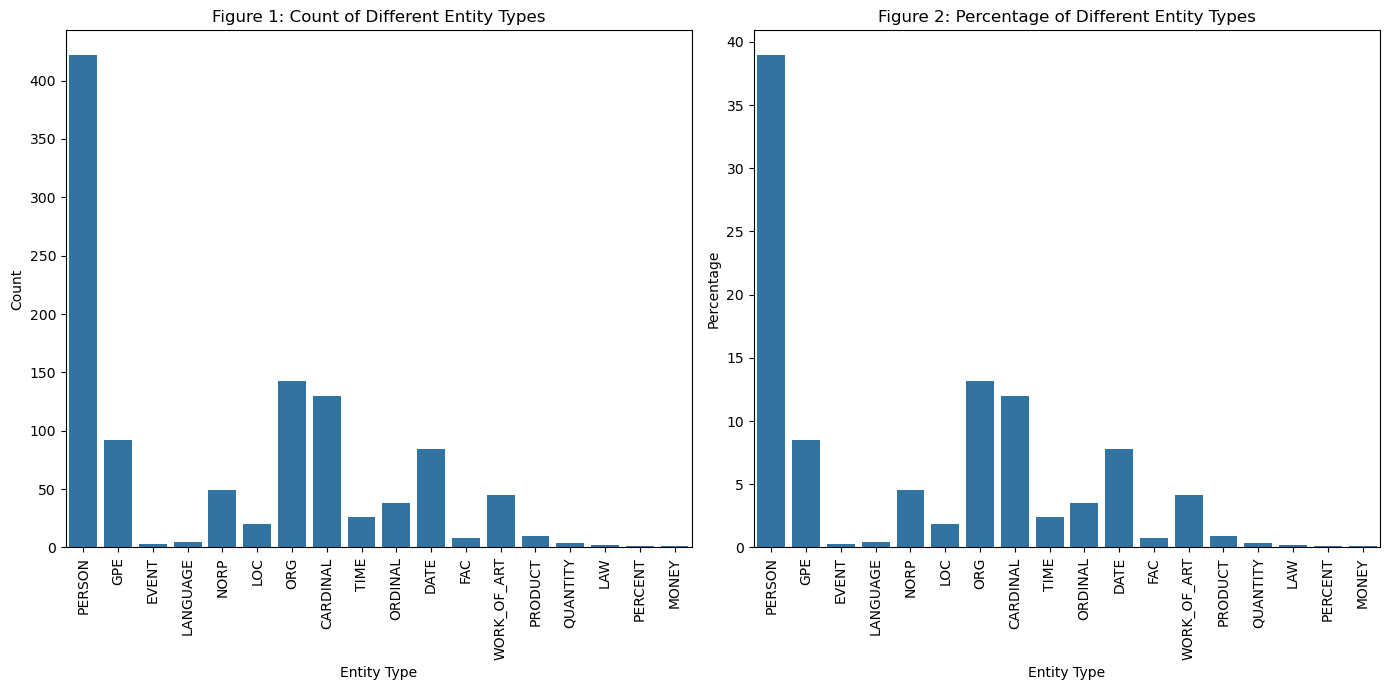

In [5]:
#We first count the occurrences of each entity type
entity_counts = Counter([label for _, label in all_entities])

#Then we convert the counter to a DataFrame 
entity_df = pd.DataFrame(entity_counts.items(), columns=['Entity Type', 'Count'])

#We then calculate the percentage of each entity type
total_entities = entity_df['Count'].sum()
entity_df['Percentage'] = (entity_df['Count'] / total_entities) * 100

#And plot the entity counts and percentages 
plt.figure(figsize=(14, 7))

#We create a bar plot for counts
plt.subplot(1, 2, 1)
sns.barplot(x='Entity Type', y='Count', data=entity_df)
plt.title('Figure 1: Count of Different Entity Types')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.xticks(rotation=90)

#And another one for percentages
plt.subplot(1, 2, 2)
sns.barplot(x='Entity Type', y='Percentage', data=entity_df)
plt.title('Figure 2: Percentage of Different Entity Types')
plt.xlabel('Entity Type')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


##### Code explanation: 

Our above code illustrates the distribution of named entity types extracted from our text data. Firstly, it sums the occurrences of each entity type stored in label within the all_entities list through the Counter class. These counts are then converted into a DataFrame 'entity_df', where each row represents an entity type alongside its corresponding count. Then, our code computes the percentage of each entity type ('Percentage' column in entity_df) relative to the total number of entities identified 'total_entities'. Finally, it creates a bar plot with two subplots side by side. The left subplot displays the absolute counts of each entity type, while the right subplot shows their percentage distribution. Each subplot is then labeled appropriately with titles and axes.

c) Build a naïve bayes classifier and use BOW and feature selection methods such as selection of the 3000 most important words. You should evaluate your model on 10 percent of the data, please report the precision, recall, accuracy, and F-score of each class.

Before building our Naive Bayes classifier, we identify the distribution of labels within our dataset.

In [6]:
#We load our dataset
df = pd.read_csv('movie.csv')

#We then count the number of occurrences of each label 
label_counts = df['label'].value_counts()

#And finally print the label distribution
print("Label Distribution:")
print(label_counts)

Label Distribution:
label
0    20019
1    19981
Name: count, dtype: int64


##### Code explanation: 

Our above code demonstrates the distribution of labels within our dataset 'movie.csv'. Firstly, our dataset is loaded into a  DataFrame 'df' using pd.read_csv(). We then assume that our dataset includes a column named 'label' that categorizes each entry. Our code then calculates the frequency of each unique label using value_counts(). The 'label_counts' variable contains unique label as an index, as well as its corresponding value represented by the count of occurrences. Finally, using the print() function, our code prints out the label distribution, displaying the frequency of each label. 

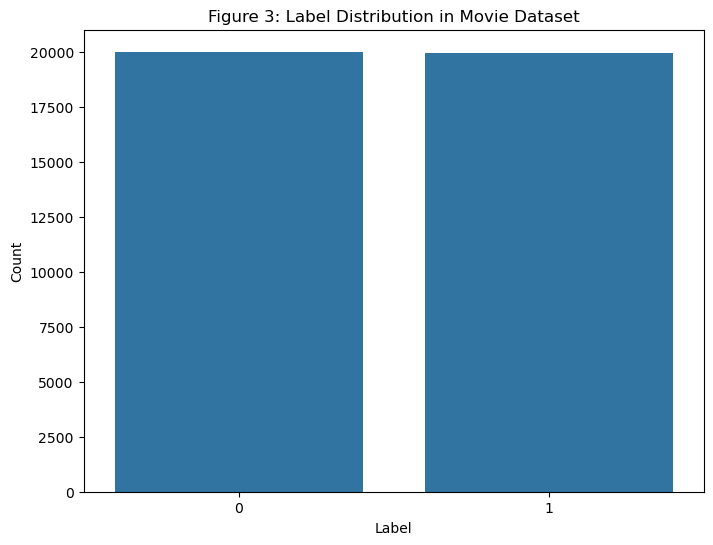

In [7]:
#We then plot our label distribution to have a good visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Figure 3: Label Distribution in Movie Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1])  
plt.show()


##### Code explanation: 

The above code aims to create a visual representation of the label distribution within our dataset. Firstly, we iniatialize a figure with a specified size of 8 by 6 inches using plt.figure(figsize=(8, 6)). Then, using the countplot() function, we generate a bar plot where the x-axis corresponds to the 'label' column from the DataFrame 'df', and the height of each bar represents the count of occurrences for each unique label. Then, we give a title to our plot using plt.title(), and using the plt.xlabel() and plt.ylabel(), we label 'Label' on the x-axis and 'Count' on the y-axis. Finally, we custom our x-axis tick using plt.xticks() to display '0' and '1', and display our plot using plt.show(). 

Then, we demonstrates text classification process using a Naïve Bayes classifier with a Bag-of-Words (BOW).

In [8]:
#We first load the dataset
df = pd.read_csv('movie.csv')

#Assuming 'text' contains our movie reviews and 'label' contains the class labels
X = df['text'].astype(str)
y = df['label']

#We then split our dataset into training (90%) and testing sets (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#And initialize CountVectorizer to create BOW representation
vectorizer = CountVectorizer(max_features=3000)

#We then fit and transform the vectorizer on our training data
X_train_bow = vectorizer.fit_transform(X_train)

#And transform our test data using the fitted vectorizer
X_test_bow = vectorizer.transform(X_test)

#We then select top 3000 features using chi-square
k = 3000
selector = SelectKBest(score_func=chi2, k=k)

#And fit the selector on our training data
X_train_selected = selector.fit_transform(X_train_bow, y_train)

#Transform our test data using the fitted selector
X_test_selected = selector.transform(X_test_bow)

#After that, we initialize Naïve Bayes classifier
nb_classifier = MultinomialNB()

#Train ir on our selected features
nb_classifier.fit(X_train_selected, y_train)

#And predict on our test data
y_pred_nb = nb_classifier.predict(X_test_selected)

#Finallym we evaluate its performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print(f'Naive Bayes Accuracy: {accuracy_nb:.4f}')
print('Naive Bayes Classification Report:')
print(report_nb)


Naive Bayes Accuracy: 0.8313
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1984
           1       0.84      0.82      0.83      2016

    accuracy                           0.83      4000
   macro avg       0.83      0.83      0.83      4000
weighted avg       0.83      0.83      0.83      4000



##### Code explanation: 

The above code demonstrates text classification process using a Naïve Bayes classifier with a Bag-of-Words (BOW) representation and feature selection. Initially, our 'movie.csv' dataset is loaded into a DataFrame 'df', assuming the column 'text' contains movie reviews and 'label' contains its corresponding class labels. Then, our dataset is split into training (90%) and testing sets (10%) using train_test_split(). After that, we initialize the CountVectorizer to create a BOW representation, limiting the feature space to the 3000 most frequent words (max_features=3000). The vectorizer is fit and transformed on the training data (X_train) to convert text into numerical features (X_train_bow), and the same transformation is applied to the test data (X_test) using transform(). Then, using the SelectKBest with chi-square (chi2) as the scoring function to select the top 3000 features (k=3000), we aimed at improving our code efficiency and performance. Then, the selector is fit on the training BOW data (X_train_bow) along with the training labels (y_train), and the transformation is applied to both training and test BOW data (X_train_selected and X_test_selected, respectively). Subsequently, we initialize a Multinomial Naïve Bayes classifier (MultinomialNB()) and train it on our selected features (X_train_selected and y_train). Following that, our code predicts results on our test data (X_test_selected), and the classifier's performance is evaluated by calculating accuracy (accuracy_score()) and generating a classification report (classification_report()). Finally, the accuracy of our Naïve Bayes classifier is printed, along with a detailed classification report showing precision, recall, and F1-score metrics for each class. 

d) Preprocess the dataset, tokenize the text, and convert it into a sequence of word embeddings (such as Word2Vec or GloVe). Design a BiLSTM classification model and train the model using the labelled dataset. Evaluate the model's performance on 10 percent of data using appropriate evaluation metrics and discuss any techniques used to handle overfitting.

In [9]:
#We first download the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

#Then we load and preprocess our dataset
df = pd.read_csv('movie.csv')

#Assuming 'text' column contains our movie reviews and 'label' contains the labels
texts = df['text'].astype(str).tolist()
labels = df['label'].tolist()

#We then preprocess and tokenize
stop_words = set(stopwords.words('english'))
tokenized_texts = []
for text in texts:
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in punctuation and token not in stop_words]
    tokenized_texts.append(tokens)

#Then, we load our GloVe embeddings
embedding_dim = 100
embeddings_index = {}
glove_file_path = 'glove.6B.100d.txt'  
with open(glove_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

#And prepare our embedding matrix
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_texts)
word_index = tokenizer.word_index
num_words = len(word_index) + 1

embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

#Then, we convert our texts to sequences of word indices and pad sequences
sequences = tokenizer.texts_to_sequences(tokenized_texts)
max_len = 100
data = pad_sequences(sequences, maxlen=max_len)

#And encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
categorical_labels = to_categorical(encoded_labels)

#After that, we split our data into training (90%) and testing (10% ) 
X_train, X_test, y_train, y_test = train_test_split(data, categorical_labels, test_size=0.1, random_state=42)

#To build our BiLSTM model
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#We then train our model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

#Evaluate it
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'BiLSTM Test Accuracy: {accuracy:.4f}')

#Predict on our test data
y_pred_bilstm = model.predict(X_test)
y_pred_classes_bilstm = np.argmax(y_pred_bilstm, axis=1)
y_test_classes_bilstm = np.argmax(y_test, axis=1)

#And convert numerical labels to string labels 
label_names_bilstm = [str(label) for label in label_encoder.classes_]

#Finally we generate our classification report
report_bilstm = classification_report(y_test_classes_bilstm, y_pred_classes_bilstm, target_names=label_names_bilstm)

print(f'BiLSTM Test Accuracy: {accuracy:.4f}')
print('BiLSTM Classification Report:')
print(report_bilstm)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ghitahousni/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ghitahousni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 37s 70ms/step - accuracy: 0.6577 - loss: 0.6100 - val_accuracy: 0.8036 - val_loss: 0.4429
Epoch 2/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.7626 - loss: 0.4965 - val_accuracy: 0.8325 - val_loss: 0.3769
Epoch 3/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 34s 67ms/step - accuracy: 0.8002 - loss: 0.4282 - val_accuracy: 0.8442 - val_loss: 0.3540
Epoch 4/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 33s 66ms/step - accuracy: 0.8188 - loss: 0.3959 - val_accuracy: 0.8536 - val_loss: 0.3465
Epoch 5/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 34s 67ms/step - accuracy: 0.8287 - loss: 0.3798 - val_accuracy: 0.8589 - val_loss: 0.3264
Epoch 6/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 34s 67ms/step - accuracy: 0.8407 - loss: 0.3629 - val_accuracy: 0.8619 - val_loss: 0.3204
Epoch 7/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 34s 66ms/step - accuracy: 0.8431 - loss: 0.3492 - val_accuracy: 0.8653 - val_loss: 0.3086
Epoch 8/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 33s 64ms/step - accuracy: 0.8526 - loss: 0.3386 - 

##### Code explanation: 

This above code illustrates the development and evaluation of a BiLSTM (Bidirectional Long Short-Term Memory) model for text classification using pre-trained GloVe embeddings. Initially, our dataset 'movie.csv' is loaded and preprocessed, with textual data stored in X and corresponding labels in y. Then, the text undergoes tokenization to remove stopwords and punctuation, and GloVe embeddings are loaded to create an embedding matrix 'embedding_matrix'. Subsequently, an Embedding layer initialized with embedding_matrix, a SpatialDropout1D layer is used for regularization, and a Bidirectional LSTM layer is used to capture contextual dependencies in both directions. After compiling our model with 'loss='categorical_crossentropy' and training it using early stopping on our training set (90%), our model's performance is evaluated on our testing (10%) set. Finally, our code prints our model accuracy of predictions and a detailed classification report in order to have insights into its ability to classify movie reviews based on the provided labels.

e) Compare the results and performance of the two designed classifiers.

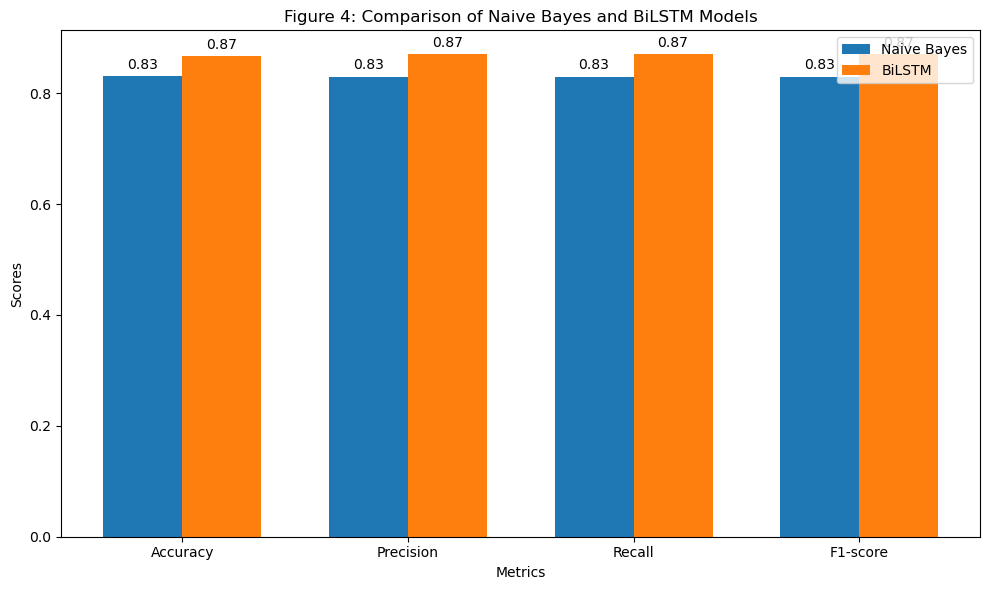

In [10]:
#We first define our classification report metrics (weighted avg)
#Naive Bayes model
accuracy_nb = 0.8313
precision_nb = 0.83  
recall_nb = 0.83     
f1_nb = 0.83         

#BiLSTM model
accuracy_bilstm = 0.8665
precision_bilstm = 0.87  
recall_bilstm = 0.87     
f1_bilstm = 0.87         

#Then, we define the values for bar graph
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
naive_bayes_values = [accuracy_nb, precision_nb, recall_nb, f1_nb]
bilstm_values = [accuracy_bilstm, precision_bilstm, recall_bilstm, f1_bilstm]

#And generate a bar graph for comparison
bar_width = 0.35
x = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - bar_width/2, naive_bayes_values, bar_width, label='Naive Bayes')
bars2 = ax.bar(x + bar_width/2, bilstm_values, bar_width, label='BiLSTM')

#We then annotate bars
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

#And add labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Figure 4: Comparison of Naive Bayes and BiLSTM Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()


##### Code explanation: 

The above code generates a comparative bar graph illustrating the performance metrics between our Naive Bayes classifier and our BiLSTM model. The metrics evaluated, including accuracy, precision, recall, and F1-score, are predefined values provided from both models (Questions c) & d)). Then, we initializes variables for these metrics and plot them side by side for easy comparison. Each metric is represented by bars for both models, with the exact numeric values displayed on top of each bar. Finally, we add labels, a legend and a title to our graph before displaying it.  

#### References: 

1. Abel, AK. (2023). Clever Cuts: Uncovering the Power of SelectKBest for Feature Selection in Machine Learning. [online] Medium. Available at: https://medium.com/@abelkuriakose/clever-cuts-uncovering-the-power-of-selectkbest-for-feature-selection-in-machine-learning-c8d20d75c82f.
2. Bhattbhatt, V. (2024). A Step-by-Step Guide to Early Stopping in TensorFlow and PyTorch. [online] Medium. Available at: https://medium.com/@vrunda.bhattbhatt/a-step-by-step-guide-to-early-stopping-in-tensorflow-and-pytorch-59c1e3d0e376.
3. Brownlee, J. (2016). How To Build Multi-Layer Perceptron Neural Network Models with Keras. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/build-multi-layer-perceptron-neural-network-models-keras/.
4. Brownlee, J. (2016). Sequence Classification with LSTM Recurrent Neural Networks in Python with Keras. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/.
5. Brownlee, J. (2022). TensorFlow 2 Tutorial: Get Started in Deep Learning With tf.keras. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/.
6. Darmanin, A (2024). Temporal Convolution Neural Network for Markets. [online] Kaggle.com. Available at: https://www.kaggle.com/code/addarm/temporal-convolution-neural-network-for-markets [Accessed 18 Jul. 2024].
7. GeeksforGeeks (2017). Removing stop words with NLTK in Python. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/removing-stop-words-nltk-python/.
8. GeeksforGeeks (2018). Python | Lemmatization with NLTK. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/python-lemmatization-with-nltk/.
9. GeeksforGeeks (2021). NumPy - Arithmetic Operations. [online] Available at: https://www.geeksforgeeks.org/numpy-arithmetic-operations/ [Accessed 18 Jul. 2024].
10. Learnopencv (2017). Implementing an MLP in TensorFlow & Keras. [online] Available at: https://learnopencv.com/implementing-mlp-tensorflow-keras/.
11. Launch code education (no date) 8.10. the string module¶ . Available at: https://education.launchcode.org/data-analysis/chapters/strings/string-module.html (Accessed: 18 July 2024).
12. Malhotra, A. (2024). Working with LSTM with an Example - Ashish Malhotra - Medium. [online] Medium. Available at: https://medium.com/@ypredofficial/working-with-lstm-with-an-example-391ce15f97fa [Accessed 18 Jul. 2024].
13. Matplotlib (n.d.). Pyplot tutorial — Matplotlib 3.8.0 documentation. [online] matplotlib.org. Available at: https://matplotlib.org/stable/tutorials/pyplot.html.
14. NLTK (2009). Natural Language Toolkit — NLTK 3.4.4 documentation. [online] Nltk.org. Available at: https://www.nltk.org/.
15. Python (2009). re — Regular expression operations — Python 3.7.2 documentation. [online] Python.org. Available at: https://docs.python.org/3/library/re.html.
16. Raj, S. (2024). TensorFlow for Natural Language Processing (NLP):-. [online] Medium. Available at: https://medium.com/@shammypratap/tensorflow-for-natural-language-processing-nlp-a702ff95d330.
17. Sanketh, R.S. (2021). Text Preprocessing with NLTK. [online] Medium. Available at: https://towardsdatascience.com/text-preprocessing-with-nltk-9de5de891658.
18. Saxena, S (2021). Understanding Embedding Layer in Keras. [online] Analytics Vidhya. Available at: https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce.
19. Scikit-learn (2018). sklearn.feature_extraction.text.CountVectorizer — scikit-learn 0.20.3 Documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html.
20. Scikit-learn (2018). sklearn.metrics.classification_report — scikit-learn 0.20.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html.
21. Scikit-learn (2018). sklearn.model_selection.train_test_split — scikit-learn 0.20.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.
22. Scikit-learn (2019). sklearn.metrics.accuracy_score — scikit-learn 0.22 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html.
23. Scikit-learn (2019). sklearn.model_selection.train_test_split — scikit-learn 0.22.1 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.
24. Scikit-learn.org. (2019). sklearn.naive_bayes.MultinomialNB — scikit-learn 0.22 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html.
25. Scikit-learn.org. (2019). sklearn.preprocessing.LabelEncoder — scikit-learn 0.22.1 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html.
26. Scikit-learn.org. (n.d.). sklearn.feature_selection.chi2 — scikit-learn 0.23.2 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html.
27. Seaborn (n.d.). An introduction to seaborn — seaborn 0.12.1 documentation. [online] Available at: https://seaborn.pydata.org/tutorial/introduction.html.
28. Solomon, B (n.d.). Generating Random Data in Python (Guide) – Real Python. [online] realpython.com. Available at: https://realpython.com/python-random/.
29. SpaCy (n.d.). Linguistic Features · spaCy Usage Documentation. [online] Available at: https://spacy.io/usage/linguistic-features.
30. Tariq (2023). Comparing Approaches to Count the Frequency of Items in a List. [online] Medium. Available at: https://medium.com/@tarek.tm/three-ways-to-count-frequency-fc0c5d32cea8#:~:text=Using%20Counter%20from%20the%20Collections%20Module&text=In%20this%20approach%2C%20we%20first [Accessed 18 Jul. 2024].
31. Training, P. (2023). Guide to NLTK - Natural Language Toolkit for Python. [online] Pierian Training. Available at: https://pieriantraining.com/guide-to-nltk-natural-language-toolkit-for-python/ [Accessed 18 Jul. 2024].
32. Verma, P. (2022). Data Cleaning for Textual Data - Analytics Vidhya - Medium. [online] Medium. Available at: https://medium.com/analytics-vidhya/data-cleaning-for-textual-data-256b4bbffd [Accessed 18 Jul. 2024].
33. W3 School (n.d.). Pandas Tutorial. [online] Available at: https://www.w3schools.com/python/pandas/default.asp.